# Vehicle Insurance Fraud Detection

#The increasing prevalence of fraudulent activities in the domain of vehicle insurance claims poses a significant challenge for insurance providers. 
As the volume of claims rises, so does the potential for deceptive practices, leading to substantial financial losses and eroding trust within the insurance industry. 
This critical issue by proposing an advanced Vehicle Insurance Claim Fraud Detection (VICFD) system.

# Operations to perform
 * EDA
   * To check missing values
   * To remove unique featuures
   * Drop junk features
   * Label encoding
   * Remove outliers
   * balancing imbalanced data

 * Model building
   * Logistic regression
   * Random forest classifier
   * Gragient boosting classifier
 * Comparing models
 * Predictions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Asus-2024\\data\\carclaims.csv")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',1000)

In [4]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,"20,000 to 29,000",15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [6]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,"20,000 to 29,000",15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,21,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15420,3,400,4,more than 30,more than 30,none,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes


# Shape

In [7]:
print("Number of records: ",df.shape[0])
print("Number of features: ",df.shape[1])

Number of records:  15420
Number of features:  33


# To check missing values

In [8]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

There is no missing values

# Checking unique features

In [9]:
for i in df.columns:
    if len(df[i]) == df[i].nunique():
        print(i)

PolicyNumber


# remove the unique features

In [10]:
for i in df.columns:
    if len(df[i]) == df[i].nunique():
        df.drop([i],axis=1,inplace=True)

policyNumber is droped

# counts

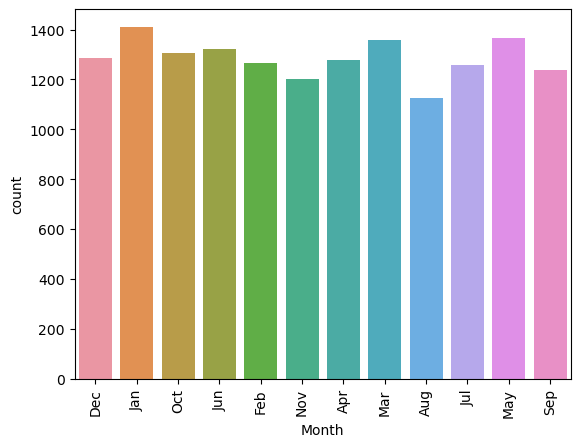

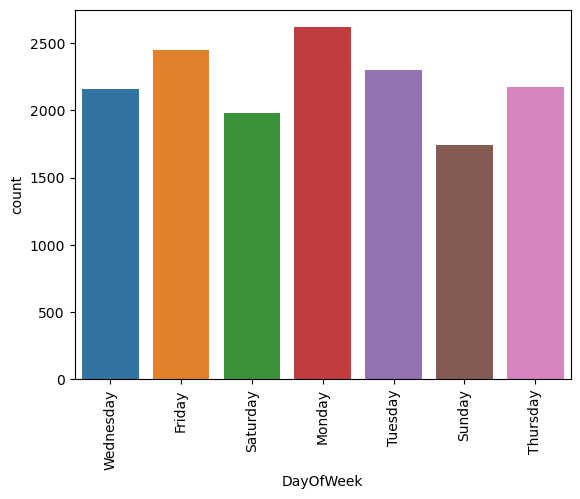

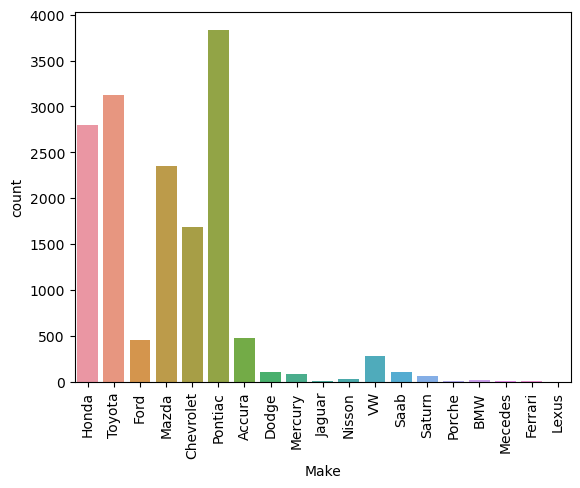

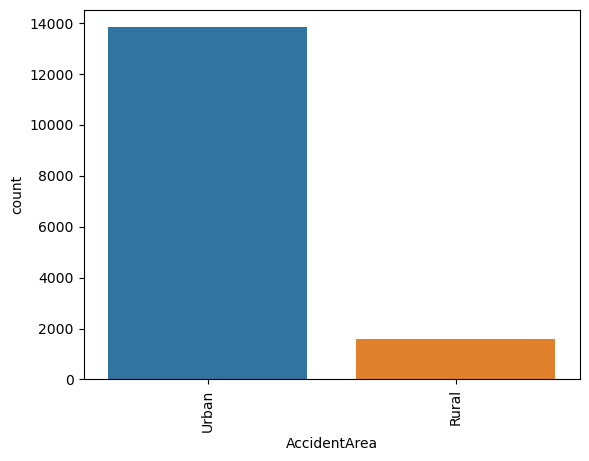

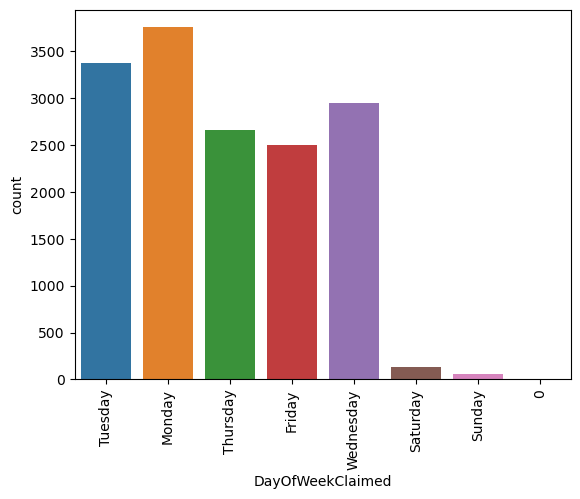

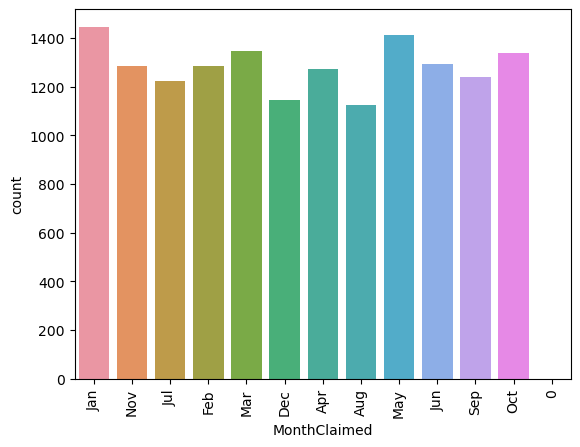

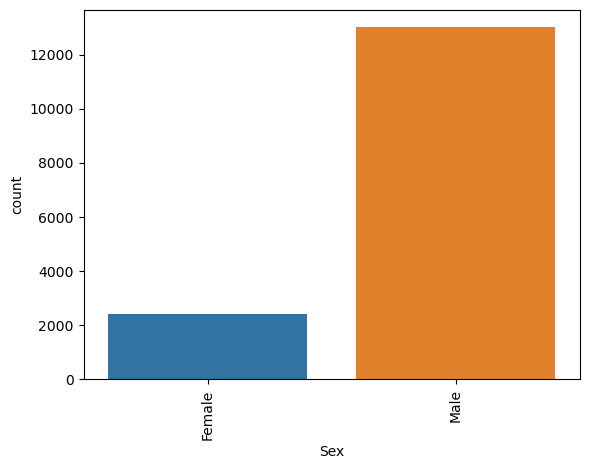

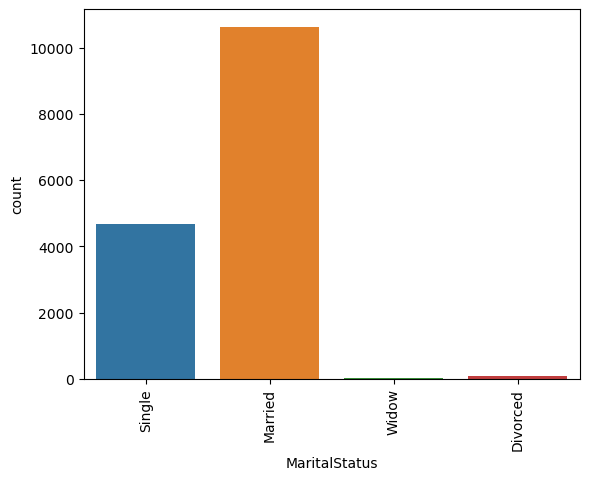

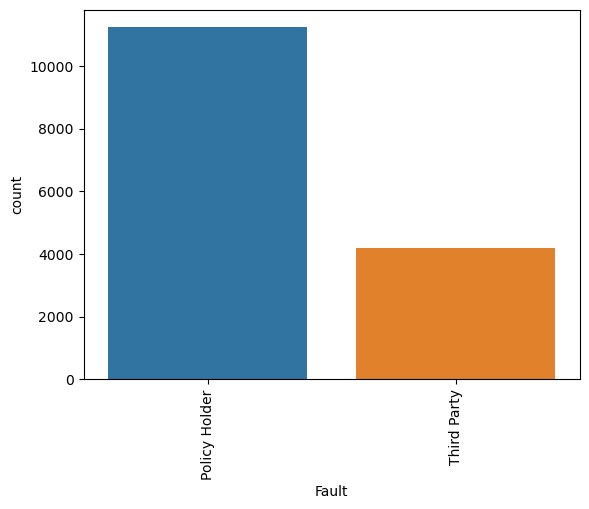

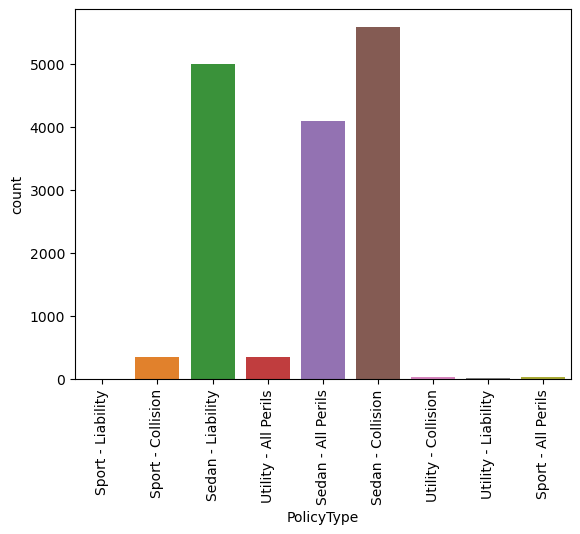

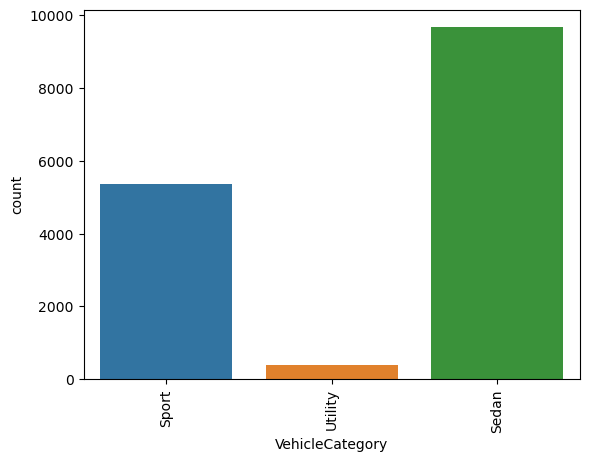

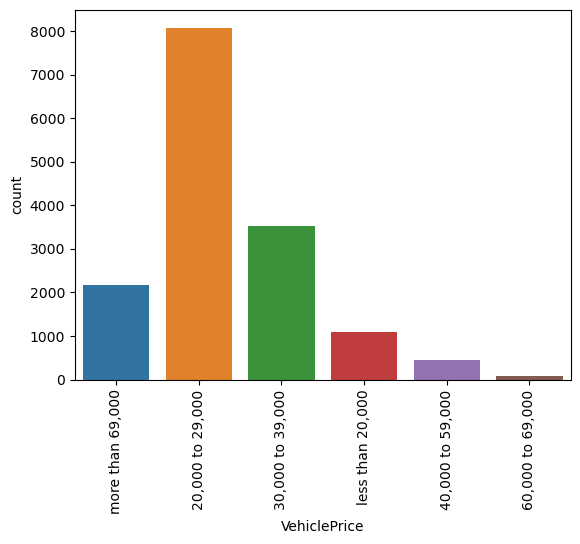

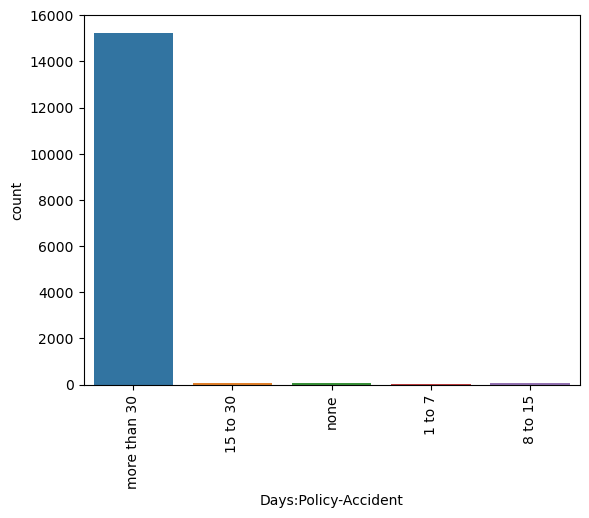

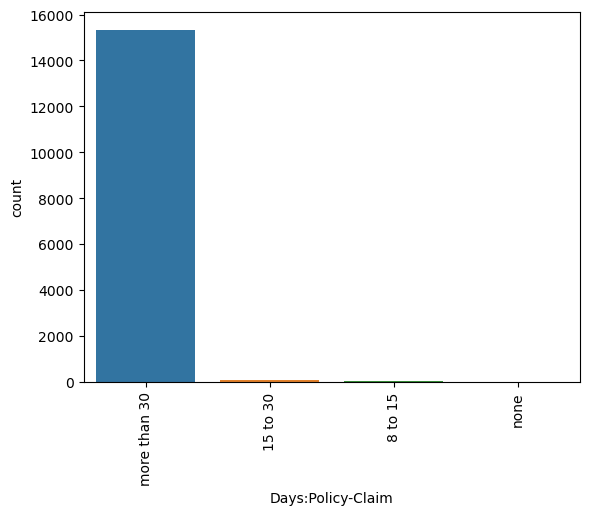

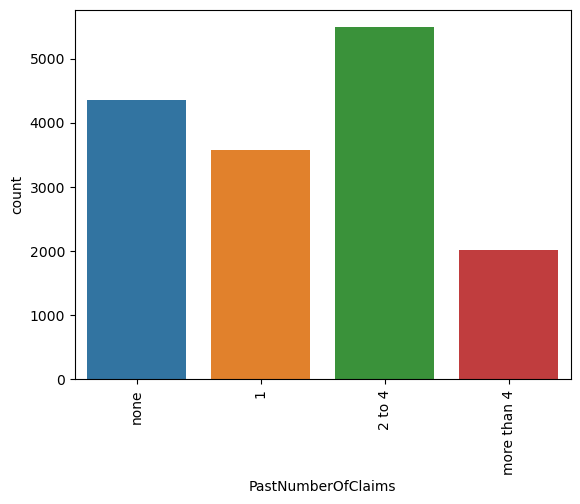

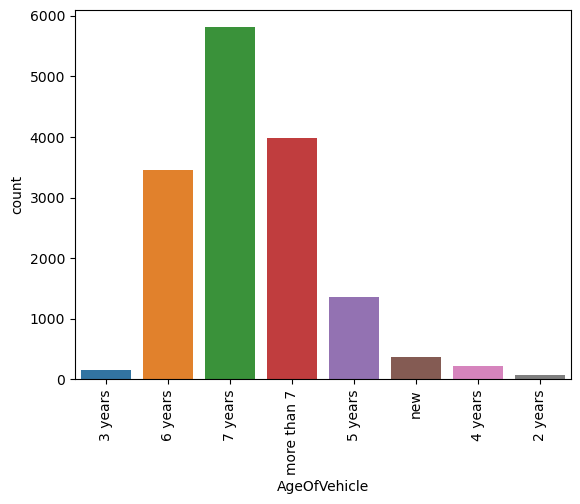

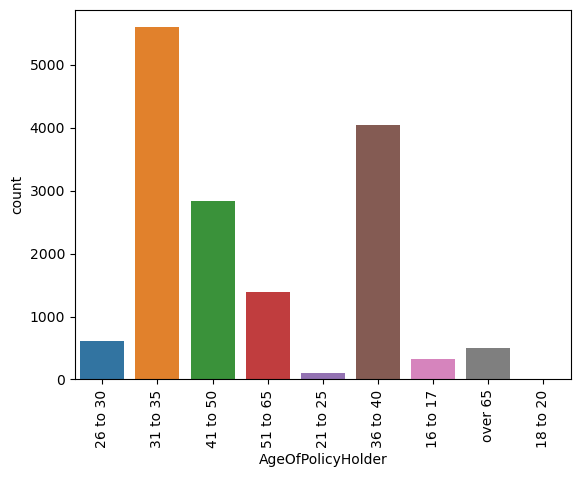

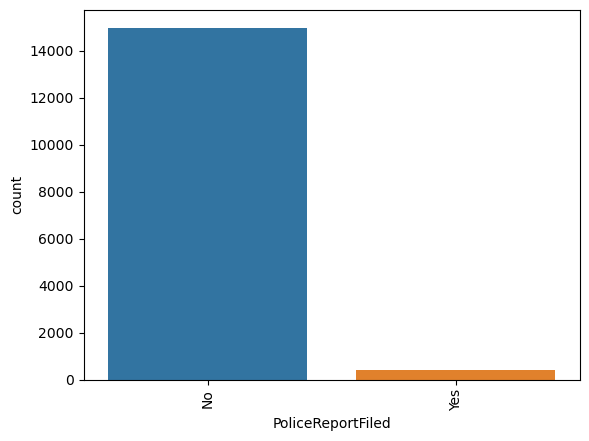

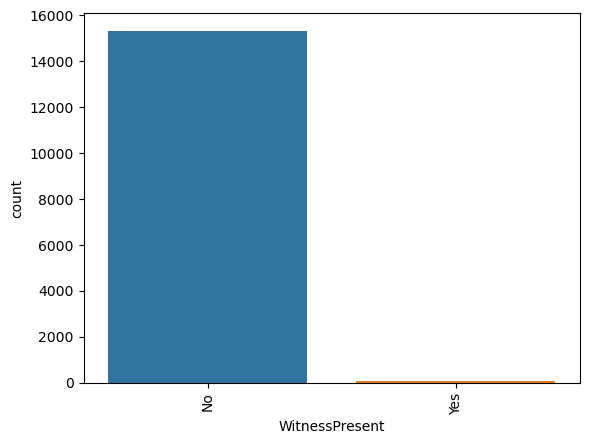

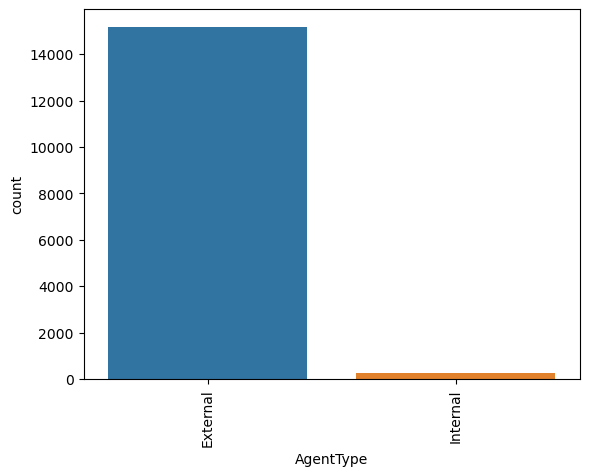

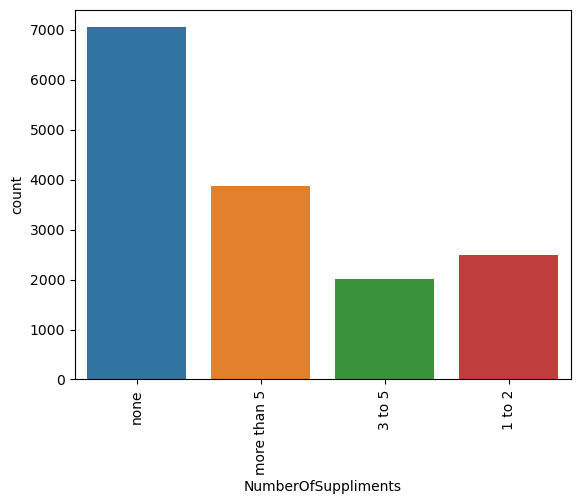

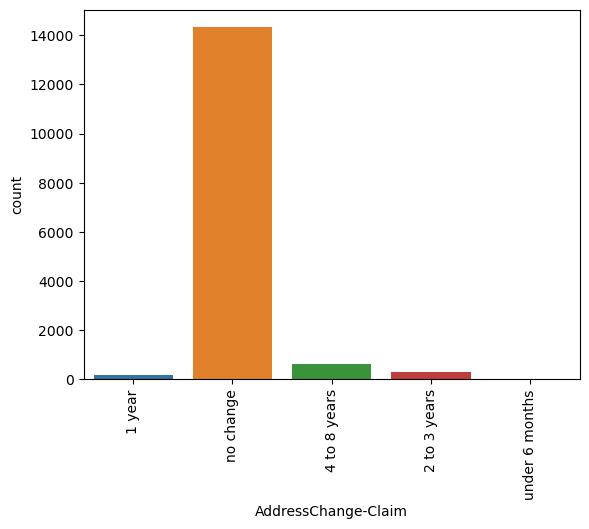

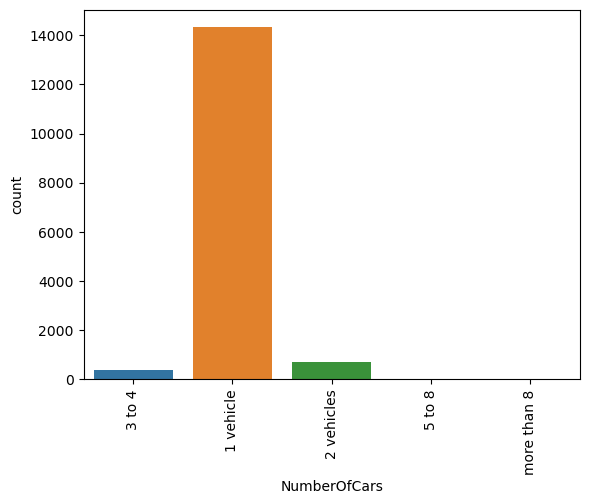

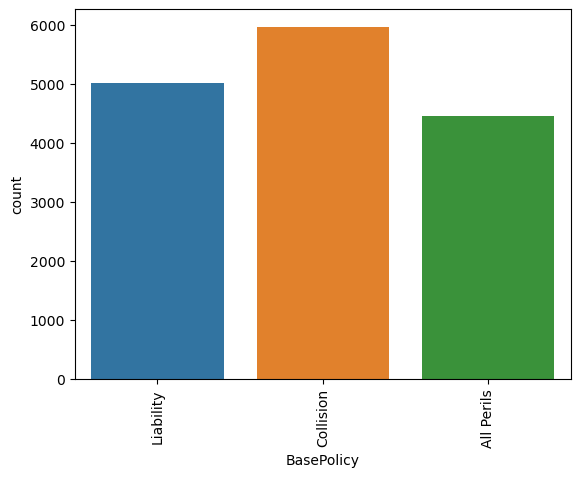

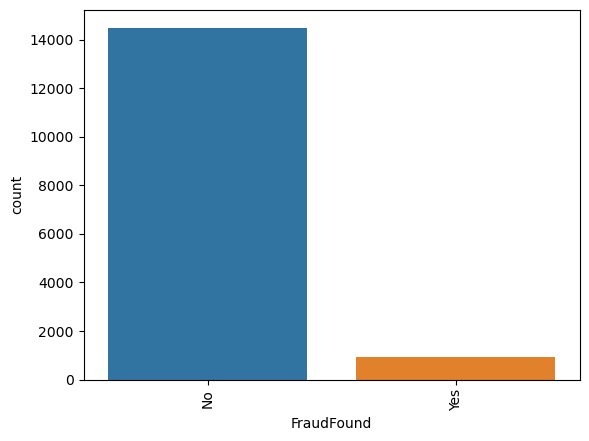

In [11]:
for i in df.columns:
    if df.dtypes[i]== object:
        sns.countplot(data=df, x=df[i])
        plt.xticks(rotation=90)
        plt.show()

By visualizing the plot. The dependent feature(FraudFound) data is imbalanced

# Droping junk features

In [12]:
df1 =  df[['Make', 'AccidentArea','Sex',
       'MaritalStatus','Fault', 'VehicleCategory',
       'VehiclePrice',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle','PolicyType','AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',
       'BasePolicy', 'FraudFound']]

In [13]:
df1

,Make,AccidentArea,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,PolicyType,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound
0,Honda,Urban,Female,Single,Policy Holder,Sport,"more than 69,000",1,more than 30,more than 30,none,3 years,Sport - Liability,26 to 30,No,No,External,none,1 year,3 to 4,Liability,No
1,Honda,Urban,Male,Single,Policy Holder,Sport,"more than 69,000",4,more than 30,more than 30,none,6 years,Sport - Collision,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision,No
2,Honda,Urban,Male,Married,Policy Holder,Sport,"more than 69,000",3,more than 30,more than 30,1,7 years,Sport - Collision,41 to 50,No,No,External,none,no change,1 vehicle,Collision,No
3,Toyota,Rural,Male,Married,Third Party,Sport,"20,000 to 29,000",2,more than 30,more than 30,1,more than 7,Sedan - Liability,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability,No
4,Honda,Urban,Female,Single,Third Party,Sport,"more than 69,000",1,more than 30,more than 30,none,5 years,Sport - Collision,31 to 35,No,No,External,none,no change,1 vehicle,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Toyota,Urban,Male,Married,Policy Holder,Sedan,"20,000 to 29,000",4,more than 30,more than 30,2 to 4,6 years,Sedan - Collision,31 to 35,No,No,External,none,no change,1 vehicle,Collision,Yes
15416,Pontiac,Urban,Male,Married,Policy Holder,Sport,"30,000 to 39,000",3,more than 30,more than 30,more than 4,6 years,Sedan - Liability,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability,No
15417,Toyota,Rural,Male,Single,Policy Holder,Sedan,"20,000 to 29,000",4,more than 30,more than 30,more than 4,5 years,Sedan - Collision,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision,Yes
15418,Toyota,Urban,Female,Married,Third Party,Sedan,"20,000 to 29,000",4,more than 30,more than 30,none,2 years,Sedan - All Perils,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils,No


These features are removed
'Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Year','Age','RepNumber',
'Deductible'

In [14]:
df1.shape

(15420, 22)

In [15]:
print("the current records are :" ,df1.shape[0])
print("the current features are :" ,df1.shape[1])

the current records are : 15420
the current features are : 22


# Label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [17]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=label_encoder.fit_transform(df1[i])

C:\Users\Asus-2024\AppData\Local\Temp\ipykernel_7472\591041546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=label_encoder.fit_transform(df1[i])
C:\Users\Asus-2024\AppData\Local\Temp\ipykernel_7472\591041546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=label_encoder.fit_transform(df1[i])
C:\Users\Asus-2024\AppData\Local\Temp\ipykernel_7472\591041546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [18]:
df1

,Make,AccidentArea,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,PolicyType,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound
0,6,1,0,2,0,1,5,1,3,2,3,1,5,3,0,0,0,3,0,2,2,0
1,6,1,1,2,0,1,5,4,3,2,3,4,4,4,1,0,0,3,3,0,1,0
2,6,1,1,1,0,1,5,3,3,2,0,5,4,6,0,0,0,3,3,0,1,0
3,17,0,1,1,1,1,0,2,3,2,0,6,2,7,1,0,0,2,3,0,2,0
4,6,1,0,2,1,1,5,1,3,2,3,3,4,4,0,0,0,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,17,1,1,1,0,0,0,4,3,2,1,4,1,4,0,0,0,3,3,0,1,1
15416,13,1,1,1,0,1,1,3,3,2,2,4,2,4,0,0,0,2,3,2,2,0
15417,17,0,1,2,0,0,0,4,3,2,2,3,1,3,0,0,0,0,3,0,1,1
15418,17,1,0,1,1,0,0,4,3,2,3,0,0,4,0,0,0,2,3,0,0,0


# Removing outliers

In [19]:
pip install pyod

In [20]:
import pyod

In [21]:
from pyod.models.cblof import CBLOF
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
model_list=[CBLOF(),IForest(),OCSVM(),KNN(),PCA()]
model_name=["cblof","iforest","ocsvm","knn","pca"]

In [23]:
out_model_dfs={}
out_records=np.zeros((df1.shape[0],))
for i,j in zip(model_name,model_list):
    out_model_dfs[i]=j.fit(df1)
    out_records+=out_model_dfs[i].predict(df1)

In [24]:
pos_out=[]
for i,j in enumerate(out_records):
    if j>=3:
        pos_out.append(i)

In [25]:
pos_out

[0,
 7,
 9,
 10,
 13,
 28,
 34,
 52,
 58,
 61,
 82,
 84,
 85,
 100,
 105,
 113,
 115,
 119,
 120,
 121,
 142,
 162,
 164,
 168,
 186,
 192,
 204,
 211,
 226,
 250,
 273,
 287,
 294,
 295,
 309,
 315,
 316,
 317,
 357,
 363,
 364,
 365,
 384,
 411,
 421,
 428,
 431,
 441,
 461,
 472,
 488,
 493,
 503,
 510,
 542,
 544,
 550,
 553,
 591,
 637,
 653,
 660,
 663,
 682,
 686,
 737,
 751,
 775,
 777,
 787,
 798,
 816,
 819,
 826,
 844,
 855,
 858,
 861,
 909,
 943,
 945,
 958,
 960,
 963,
 984,
 1001,
 1002,
 1020,
 1026,
 1053,
 1058,
 1070,
 1071,
 1072,
 1107,
 1146,
 1149,
 1178,
 1182,
 1185,
 1186,
 1189,
 1224,
 1256,
 1258,
 1268,
 1270,
 1271,
 1275,
 1284,
 1296,
 1314,
 1344,
 1351,
 1357,
 1364,
 1381,
 1383,
 1388,
 1402,
 1414,
 1431,
 1438,
 1447,
 1453,
 1456,
 1464,
 1489,
 1516,
 1530,
 1531,
 1535,
 1537,
 1538,
 1551,
 1555,
 1579,
 1581,
 1584,
 1598,
 1617,
 1622,
 1641,
 1650,
 1652,
 1661,
 1675,
 1676,
 1684,
 1688,
 1707,
 1736,
 1765,
 1788,
 1794,
 1811,
 1830,
 1

In [26]:
df1.drop(index=pos_out,axis=0,inplace=True)

In [27]:
df1.shape

(14360, 22)


# Check whether the data is balanced or not

In [28]:
df1.FraudFound.value_counts()

FraudFound
0    13618
1      742
Name: count, dtype: int64

<Axes: xlabel='FraudFound', ylabel='count'>

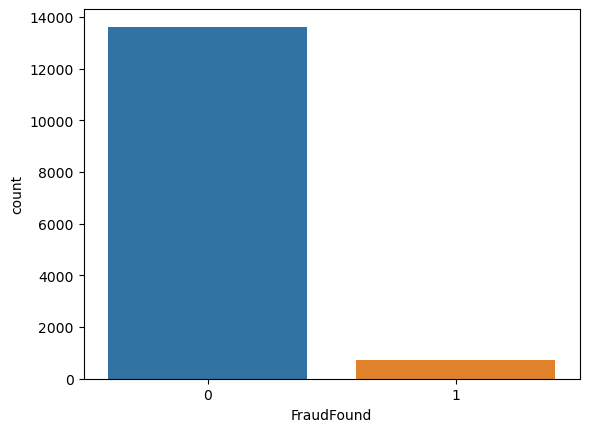

In [29]:
sns.countplot(x=df1["FraudFound"])

                                The data is imbalanced

# Data split

In [39]:
x = df1.drop('FraudFound',axis=1)
y = df1['FraudFound']

# Balancing the imbalanced data

In [40]:
pip install SMOTE

Note: you may need to restart the kernel to use updated packages.


In [41]:
from imblearn.combine import SMOTETomek

In [42]:
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_resample(x,y)

<Axes: xlabel='FraudFound', ylabel='count'>

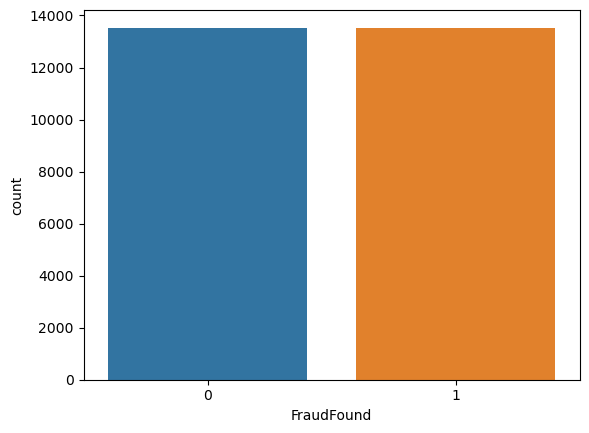

In [43]:
sns.countplot(x=y_res)

In [45]:
y_res.value_counts()

FraudFound
0    13529
1    13529
Name: count, dtype: int64

                               The data is balanced

In [51]:
df1

,Make,AccidentArea,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,PolicyType,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound
2,6,1,1,1,0,1,5,3,3,2,0,5,4,6,0,0,0,3,3,0,1,0
3,17,0,1,1,1,1,0,2,3,2,0,6,2,7,1,0,0,2,3,0,2,0
5,6,1,1,2,1,1,5,3,3,2,3,3,4,2,0,0,0,1,3,0,1,0
6,6,1,1,1,1,1,5,1,3,2,0,5,4,5,0,0,0,0,3,0,1,0
7,6,1,1,2,0,1,5,4,3,2,0,7,4,0,0,0,0,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,2,1,1,2,1,0,1,4,3,2,3,5,1,7,0,0,0,0,2,1,1,0
15415,17,1,1,1,0,0,0,4,3,2,1,4,1,4,0,0,0,3,3,0,1,1
15416,13,1,1,1,0,1,1,3,3,2,2,4,2,4,0,0,0,2,3,2,2,0
15417,17,0,1,2,0,0,0,4,3,2,2,3,1,3,0,0,0,0,3,0,1,1


# Model building

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [54]:
xtrain.shape,ytrain.shape

((21712, 21), (21712,))

In [55]:
xtest.shape,ytest.shape

((5428, 21), (5428,))

# Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model=LogisticRegression()

In [58]:
model

LogisticRegression()

In [59]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [60]:
predict=model.predict(xtest)

In [61]:
predict

array([0, 1, 0, ..., 1, 1, 0])

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [63]:
tn,fp,fn,tp=confusion_matrix(ytest,predict).ravel()

In [64]:
tn,fp,fn,tp

(1971, 738, 243, 2476)

In [65]:
con_matrix=tn,fp,fn,tp

<Axes: title={'center': 'Confusion Matrix'}>

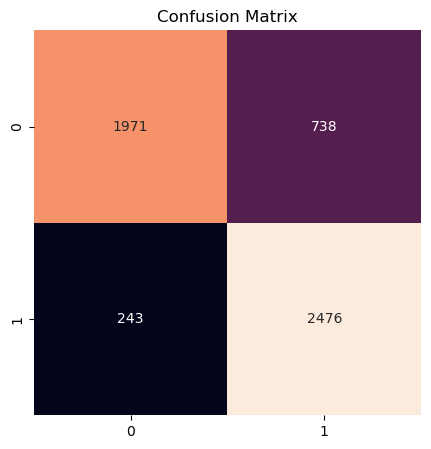

In [66]:
con_matrix = confusion_matrix(ytest,predict)
con_matrix = pd.DataFrame(con_matrix,range(2),range(2))
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix")
sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

In [67]:
lr_accuracy=(tp+tn)/(tn+fp+fn+tp)

In [68]:
lr_accuracy

0.8192704495210023

                    Accuracy of LogisticRegression is 81 percentage

In [69]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2709
           1       0.77      0.91      0.83      2719

    accuracy                           0.82      5428
   macro avg       0.83      0.82      0.82      5428
weighted avg       0.83      0.82      0.82      5428




# RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [72]:
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [73]:
y_pred = rf_classifier.predict(xtest)

In [74]:
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [75]:
rf_accuracy = accuracy_score(ytest, y_pred)
print(f"rf_Accuracy: {rf_accuracy}")

rf_Accuracy: 0.9485998526160648


In [76]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2709
           1       0.93      0.98      0.95      2719

    accuracy                           0.95      5428
   macro avg       0.95      0.95      0.95      5428
weighted avg       0.95      0.95      0.95      5428



# GradientBoostingClassifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [79]:
gb_classifier.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=42)

In [80]:
pred_gb = gb_classifier.predict(xtest)

In [81]:
pred_gb

array([0, 1, 0, ..., 1, 1, 0])

In [82]:
gb_accuracy = accuracy_score(ytest, pred_gb)
print(f"gb_Accuracy: {gb_accuracy}")

gb_Accuracy: 0.8526160648489315


# Comparing model

In [83]:
data = {'Model':['Logistic Regression','RandomForest Classifier', 'GradientBoostingClassifier' ],
        
        'Accuracy Score':[lr_accuracy,rf_accuracy,gb_accuracy]}

comparing_model=pd.DataFrame(data)                               
print(comparing_model)

                        Model  Accuracy Score
0         Logistic Regression        0.819270
1     RandomForest Classifier        0.948600
2  GradientBoostingClassifier        0.852616


# Comparing these model, Random Forest Classifier has the highest accuracy

In [89]:
import pickle
file_name = 'savemodel.sav'
pickle.dump(rf_classifier,open(file_name,'wb'))

In [90]:
xtest.head()

,Make,AccidentArea,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,PolicyType,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy
10352,6,1,1,1,1,1,1,1,3,2,0,6,2,6,0,0,0,2,3,0,2
10007,5,1,1,1,0,0,1,4,3,2,0,5,0,5,0,0,0,2,3,0,0
10054,2,1,1,1,0,1,0,2,3,2,2,3,2,4,0,0,0,3,3,0,2
4093,13,1,1,1,1,0,0,4,3,2,1,5,1,4,0,0,0,2,3,2,1
3757,9,1,1,1,0,0,0,2,3,2,0,5,1,4,0,0,0,3,3,0,1


In [86]:
load_model = pickle.load(open(file_name,'rb'))

In [87]:
load_model.predict([[6,0,1,1,1,0,4,1,3,2,0,5,0,5,0,0,0,3,3,0,0,]])

array([0])

# Fraud Found
## 0 ---- NO
## 1---- YES